# Decision Tree

### Importação de Bibliotecas

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

### Leitura de Arquivo CSV - atenção ao separador ";"

In [12]:
df = pd.read_csv("./tennis.csv",sep=";") 
df # mostra todo o dataset no formato original (dados categóricos)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [13]:
for col in df:
    print(col, df[col].unique())

outlook ['sunny' 'overcast' 'rainy']
temp ['hot' 'mild' 'cool']
humidity ['high' 'normal']
windy [False  True]
play ['no' 'yes']


### Transformação dos dados categóricos para numéricos (features), com exceção à classe (target)

In [14]:
translate = {
    'outlook': { 'sunny': 2, 'overcast': 1, 'rainy': 0 },
    'temp': { 'hot':2, 'mild':1, 'cool':0 },
    'humidity': { 'high': 1, 'normal': 0 },
    'windy': { True:1, False:0 },
    'play': { 'yes': 'Yes', 'no': 'No' }
}

translate

for col in df:
    df[col] = df[col].apply(lambda k: translate[col][k])
df.info() # mostra informações básicas do dataset como quais colunas (e seus tipos) e uso de memória

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     int64 
 1   temp      14 non-null     int64 
 2   humidity  14 non-null     int64 
 3   windy     14 non-null     int64 
 4   play      14 non-null     object
dtypes: int64(4), object(1)
memory usage: 688.0+ bytes


In [15]:
# mostra as primeiras linhas do dataset (útil em caso de grandes datasets)
# observe que agora os dados estão convertidos em formato adequado ao algoritmo
df.head()

,outlook,temp,humidity,windy,play
0,2,2,1,0,No
1,2,2,1,1,No
2,1,2,1,0,Yes
3,0,1,1,0,Yes
4,0,0,0,0,Yes


### Treinamento do Modelo

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=75) # 33% para Testes
# train=df
# test=df
train.reset_index(inplace=True)
test.reset_index(inplace=True)
f"dataset size: {len(df)} train size: {len(train)} test size: {len(test)}"

'dataset size: 14 train size: 14 test size: 14'

In [17]:
def data_target_split(df: pd.DataFrame):
    target = df['play'] # separa a coluna target (colunas com os dados das classes) => Y
    data = df.loc[:, 'outlook':'windy'] # separa as colunas de features (colunas com os dados das features) => X
    return data, target

train_x, train_y = data_target_split(train)
test_x, test_y = data_target_split(test)

In [18]:
from dataclasses import dataclass
@dataclass(frozen=True)
class ModelResult:
    n: int
    clf: DecisionTreeClassifier
    acc: float

In [30]:
def tree_model(max_depth: int):
    # clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42) # usa "gini" como padrão
    # constrói o modelo usando critério “Entropia” e max_depth variável
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42) 
    
    # treina o modelo – observe que nessa abordagem está usando 33% para testes (ver acima!)
    # (sem separação)
    clf.fit(train_x, train_y)

    # aplica o modelo e mede acurácia
    pred_y = clf.predict(test_x)
    acc = metrics.accuracy_score(test_y, pred_y)
    return ModelResult(acc=acc, clf=clf, n=max_depth)

# mostra resultados de acurácil para cada modelo gerado por tree_model
results = {n: tree_model(n) for n in range(1,5)}
print(*[(n, r.acc) for n, r in results.items()])  # indice, acuracia


(1, 0.7142857142857143) (2, 0.8571428571428571) (3, 0.9285714285714286) (4, 1.0)


### Apresentação dos Resultados

Index(['outlook', 'temp', 'humidity', 'windy'], dtype='object') ['No' 'Yes']


[Text(0.5, 0.8333333333333334, 'humidity <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.25, 0.5, 'outlook <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = Yes'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.75, 0.5, 'outlook <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = No'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No')]

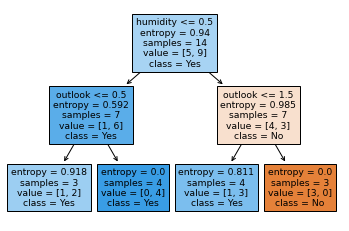

In [20]:
# Plotagem da árvore
clf = results[2].clf
f_names = test_x.columns
c_names = test_y.unique().astype(str)
print(f_names, c_names)
tree.plot_tree(clf, feature_names=f_names,class_names=c_names, filled=True)

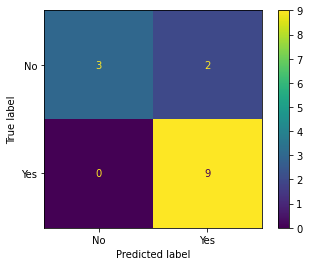

In [21]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(test_x);
cm = confusion_matrix(test_y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [22]:
# Testando para uma entrada específica:
W_test = pd.DataFrame({'outlook': [0], 'temp': [1], 'humidity': [1], 'windy': [0],})
y_pred = clf.predict(W_test)
y_pred

array(['Yes'], dtype=object)